In [1]:
import sys
sys.path.append('../../')

In [2]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
#from common.utils import load_data, mape

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
cd /content/drive/"MyDrive/"

/content/drive/MyDrive


In [8]:
dataset = pd.read_csv('Colab Notebooks/Linear Regression/time_series_covid19_deaths_US.csv')


In [9]:
dataf= pd.DataFrame(dataset)
col = list(dataset.columns.values)
col_value = (list(dataf.sum(axis = 0, skipna = True)))
df1 = pd.DataFrame(list(zip(col, col_value)),columns =['Title', 'Values'])
data = df1.drop(df1.index)
print(df1)

       Title                                             Values
0        UID                                       278822801147
1       iso2  USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
2       iso3  USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...
3      code3                                            2788882
4       FIPS                                        110099539.0
..       ...                                                ...
727   1/6/22                                             836605
728   1/7/22                                             837266
729   1/8/22                                             837665
730   1/9/22                                             839500
731  1/10/22                                             842141

[732 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
col1 = list(df1.columns.values)
print(col1)
#df1 = df1.drop(723) 
#df1 = df1.drop(0) 
#df1 = df1.drop(1) 
#df1 = df1.drop(2) 
#df1 = df1.drop(3) 
df1 = df1.drop(4) 
df1 = df1.drop(5) 
df1 = df1.drop(6) 
df1 = df1.drop(7) 
df1 = df1.drop(8)
df1 = df1.drop(9) 
df1 = df1.drop(10)
df1 = df1.drop(11)


df1

['Title', 'Values']


,Title,Values
12,1/22/20,1
13,1/23/20,1
14,1/24/20,1
15,1/25/20,1
16,1/26/20,1
...,...,...
727,1/6/22,836605
728,1/7/22,837266
729,1/8/22,837665
730,1/9/22,839500


In [16]:

#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

dates = df1['Title']
date_format = [pd.to_datetime(d) for d in dates]
date_time = [date_format[d].strftime("%d-%m-%Y %H:%M:%S") for d in range(719)]
str_date_time = date_format[0].strftime("%d-%m-%Y %H:%M:%S")
#df1.set_index('Title',inplace=True)

In [17]:
#print(date_format)
#df1.set_index(date_time,inplace=True)
df1['Time'] = date_time
print(df1)

       Title  Values                 Time
12   1/22/20       1  22-01-2020 00:00:00
13   1/23/20       1  23-01-2020 00:00:00
14   1/24/20       1  24-01-2020 00:00:00
15   1/25/20       1  25-01-2020 00:00:00
16   1/26/20       1  26-01-2020 00:00:00
..       ...     ...                  ...
727   1/6/22  836605  06-01-2022 00:00:00
728   1/7/22  837266  07-01-2022 00:00:00
729   1/8/22  837665  08-01-2022 00:00:00
730   1/9/22  839500  09-01-2022 00:00:00
731  1/10/22  842141  10-01-2022 00:00:00

[719 rows x 3 columns]


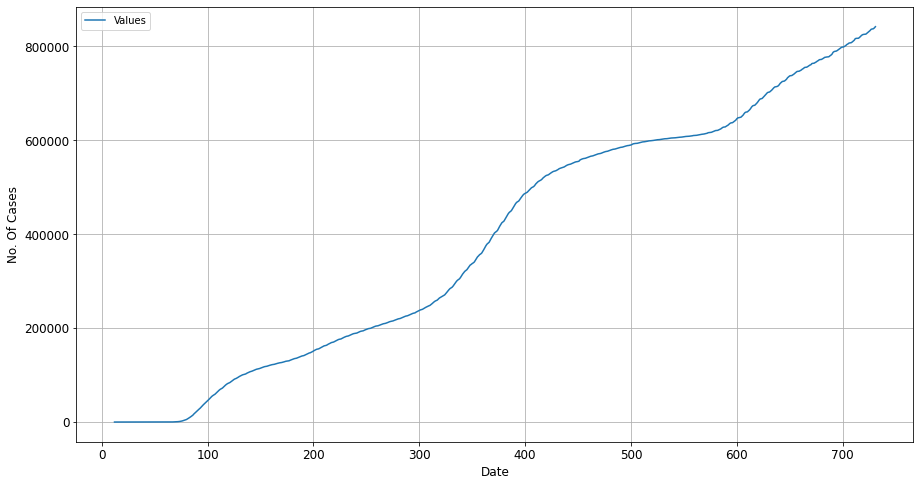

In [18]:
df1.plot(y='Values', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('No. Of Cases', fontsize=12)
plt.grid()
plt.show()

In [19]:
train_start_dt = '02-10-2021 00:00:00'
test_start_dt = '21-12-2021 00:00:00'

In [24]:
df1.set_index('Time',inplace=True)

In [25]:
df1.tail(100)

,Title,Values
Time,,
02-10-2021 00:00:00,10/2/21,703004
03-10-2021 00:00:00,10/3/21,704963
04-10-2021 00:00:00,10/4/21,706870
05-10-2021 00:00:00,10/5/21,709501
06-10-2021 00:00:00,10/6/21,711980
...,...,...
06-01-2022 00:00:00,1/6/22,836605
07-01-2022 00:00:00,1/7/22,837266
08-01-2022 00:00:00,1/8/22,837665


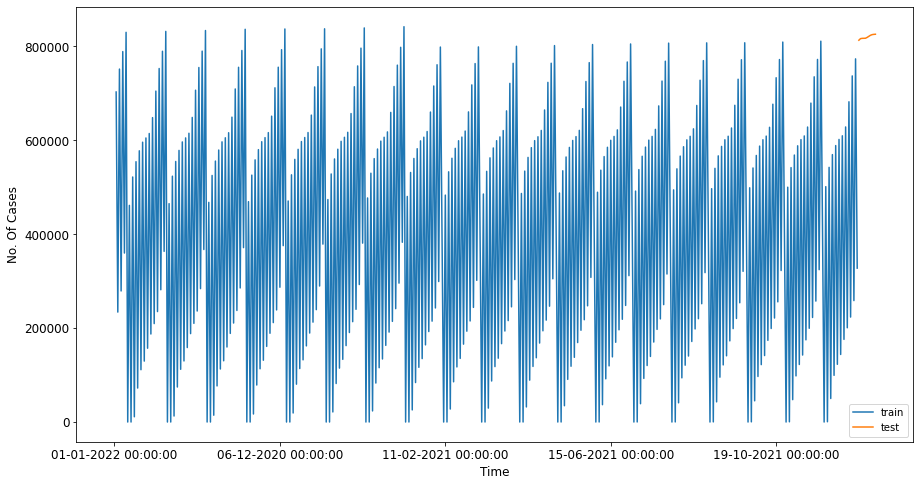

In [26]:
df1[(df1.index < test_start_dt) & (df1.index >= train_start_dt)][['Values']].rename(columns={'Values':'train'}) \
    .join(df1[test_start_dt:][['Values']].rename(columns={'Values':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('No. Of Cases', fontsize=12)
plt.show()

In [27]:
train = df1.copy()[(df1.index >= train_start_dt) & (df1.index < test_start_dt)][['Values']]
test = df1.copy()[df1.index >= test_start_dt][['Values']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (449, 1)
Test data shape:  (228, 1)


In [28]:
scaler = MinMaxScaler()
train['Values'] = scaler.fit_transform(train)

In [29]:
test['Values'] = scaler.transform(test)

In [30]:
# Converting to numpy arrays
train_data = train.values
test_data = test.values

In [31]:
timesteps=5

In [32]:
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape

(445, 5)

In [33]:
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(224, 5)

In [34]:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(445, 4) (445, 1)
(224, 4) (224, 1)


In [35]:
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)

In [36]:
model.fit(x_train, y_train[:,0])

SVR(C=10, epsilon=0.05, gamma=0.5)

In [37]:
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(445, 1) (224, 1)


In [38]:
# Scaling the predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

445 224


In [39]:
# Scaling the original values
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

print(len(y_train), len(y_test))

445 224


In [40]:
train_timestamps = df1[(df1.index < test_start_dt) & (df1.index >= train_start_dt)].index[timesteps-1:]
test_timestamps = df1[(df1.index >=test_start_dt)].index[timesteps-1:]

print(len(train_timestamps), len(test_timestamps))

445 224


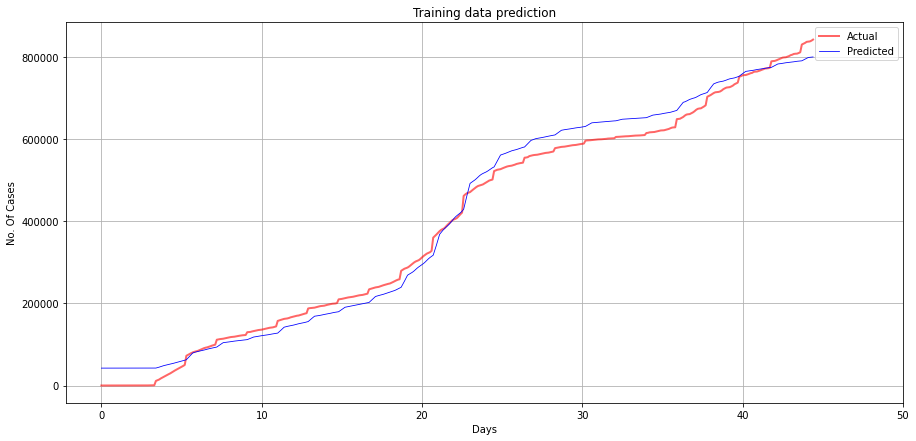

In [41]:
plt.figure(figsize=(15,7))
plt.plot(train_timestamps, y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Days')
plt.ylabel('No. Of Cases')
plt.title("Training data prediction")

x_ticks = [0,100,200,300,400,500]

#specify x-axis labels
x_labels = [0, 10, 20, 30, 40, 50, 60, 70]

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()
plt.show()

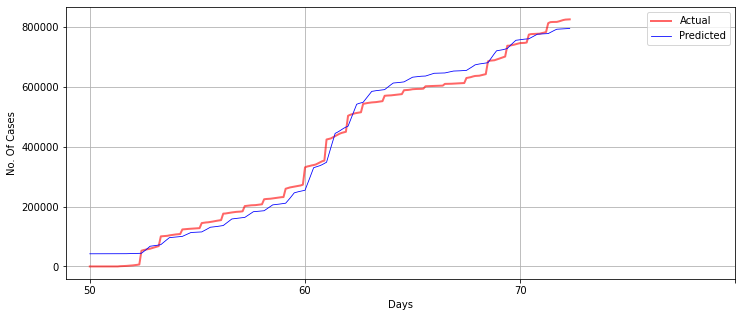

In [42]:
plt.figure(figsize=(12,5))
plt.plot(test_timestamps, y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Days')
plt.ylabel('No. Of Cases')

x_ticks = [0,100,200,300]

#specify x-axis labels
x_labels = [50,60,70]

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()
plt.show()